In [10]:
#some imports and loading the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from string import punctuation
from dateutil.parser import parse
from collections import Counter
import numpy as np


Loading the Data

In [11]:
df_SpamAssasin = pd.read_csv('SpamAssasin.csv')
df_Nigerian_Fraud = pd.read_csv('Nigerian_Fraud.csv')
df_phishing_email = pd.read_csv('phishing_email.csv')
df_CEAS_08 = pd.read_csv('CEAS_08.csv')
df_Enron = pd.read_csv('Enron.csv')
df_Ling = pd.read_csv('Ling.csv')
df_Nazario = pd.read_csv('Nazario.csv')

Data Type Check and Basic Summary Statistics

In [42]:
df_phishing_email.info() 
df_phishing_email.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


,label
count,82486.000000
mean,0.519979
std,0.499604
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


# Data Initial Preprocessing

### Converting Text to Lowercase

In [12]:
lower_letters = df_phishing_email.copy()
lower_letters["text_combined"] = lower_letters["text_combined"].str.lower()
lower_letters.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


### Remove duplicates

In [13]:
total_rec = lower_letters.shape[0]
duplicates = lower_letters.duplicated(subset=['text_combined', 'label'])
count_dups = duplicates.sum()
data_no_dups = lower_letters[~duplicates]
print("There were", count_dups, "duplicates that were deleted which are",round(count_dups/total_rec,3) ,"of data\nLeft", total_rec-count_dups, "records")

There were 408 duplicates that were deleted which are 0.005 of data
Left 82078 records


### Handling Missing Data

In [14]:
null_counts = data_no_dups.isnull().sum()
null_counts

text_combined    0
label            0
dtype: int64

### Cleaning the text
removing stop words and stemming the remaining words.

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# אופציונלי - להוסיף מילים שהן סטופ וורדס
#stop_words = set(stopwords.words('english'))
#custom_stop_words = set(['email', 'domain', 'etc'])  # Add your specific words here
#stop_words.update(custom_stop_words)

def clean_text_stemming(text):
    # Tokenize the string to seperate words
    words = nltk.word_tokenize(text)
    # condicting stop words cleaning 
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
     # conducting stemming on the clean words
    stemmed_words = [PorterStemmer().stem(word) for word in filtered_words]
    
    return ' '.join(stemmed_words)
    
lower_letters['cleaned_text'] = lower_letters['text_combined'].apply(clean_text_stemming)
lower_letters.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ronishai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ronishai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text_combined,label,email_length,cleaned_text
0,hpl nom may 25 2001 see attached file hplno 52...,0,65,hpl nom may see attach file hplno xl hplno xl
1,nom actual vols 24 th forwarded sabrae zajac h...,0,1071,nom actual vol th forward sabra zajac hou ect ...
2,enron actuals march 30 april 1 201 estimated a...,0,148,enron actual march april estim actual march fl...
3,hpl nom may 30 2001 see attached file hplno 53...,0,65,hpl nom may see attach file hplno xl hplno xl
4,hpl nom june 1 2001 see attached file hplno 60...,0,65,hpl nom june see attach file hplno xl hplno xl


### Identifying and Removing Outliers

Analyze the text length or other relevant parameters to identify and remove outliers. This step is crucial before conducting further analysis to ensure the data is representative.

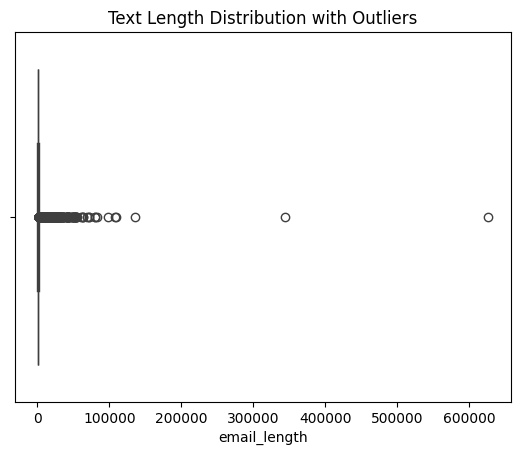

count     82486.000000
mean        915.967461
std        3268.528543
min           0.000000
25%         218.000000
50%         438.000000
75%        1052.000000
max      626925.000000
Name: email_length, dtype: float64


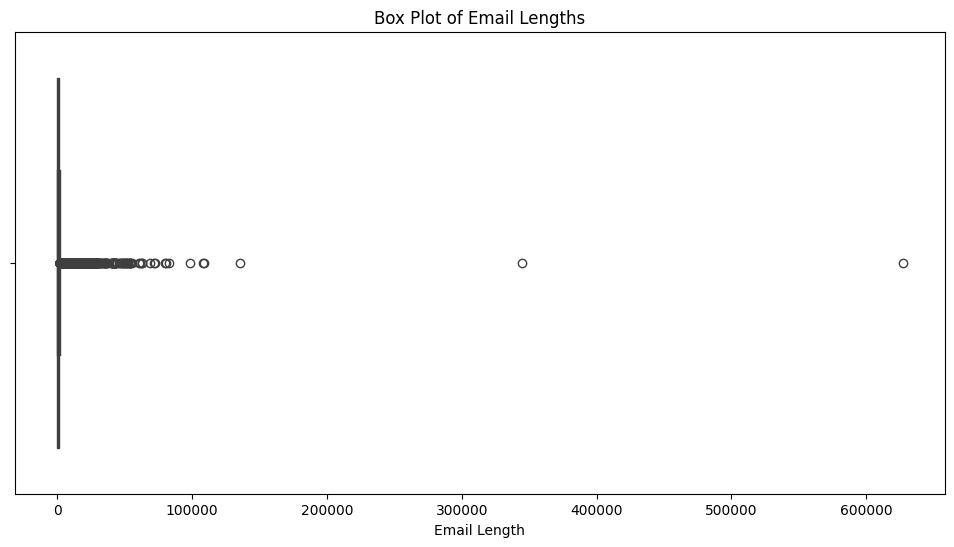

data shape before outliers removal: 82486 and after: 76876


In [45]:

# Calculate the length of each email
lower_letters['email_length'] = lower_letters['cleaned_text'].apply(len)

# Display basic statistics of email lengths
email_length_stats = lower_letters['email_length'].describe()
print(email_length_stats)

# Visualize the distribution of email lengths with a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=lower_letters['email_length'])
plt.title('Box Plot of Email Lengths')
plt.xlabel('Email Length')
plt.show()

# Calculate IQR
Q1 = lower_letters['email_length'].quantile(0.25)
Q3 = lower_letters['email_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_data = lower_letters[(lower_letters['email_length'] >= lower_bound) & 
                                    (lower_letters['email_length'] <= upper_bound)]

# Display the shape of the filtered data
print(f'data shape before outliers removal: {lower_letters.shape[0]} and after: {filtered_data.shape[0]}')


### Data Expolration

### Word Distribution Analysis

20 המילים הנפוצות ביותר ותדירותן:
aug: 45002
email: 33436
pleas: 33088
use: 29210
enron: 26263
ect: 25314
get: 25001
one: 24582
top: 23722
time: 23577
go: 23150
mail: 22544
would: 20348
new: 20244
work: 19832
messag: 19732
need: 19245
list: 19227
receiv: 19018
inform: 18665


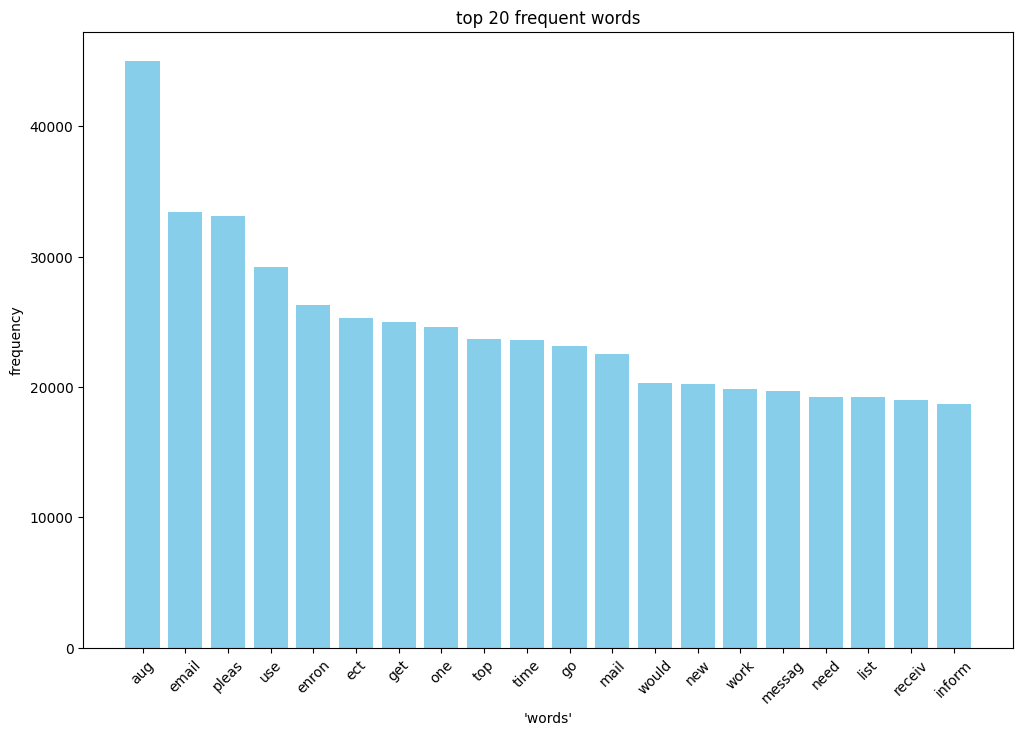

In [23]:
# איחוד כל הטקסטים מהעמודה cleaned_text למחרוזת אחת
text_combined = " ".join(filtered_data["cleaned_text"].tolist())

# טוקניזציה של הטקסט המאוחד
words = nltk.word_tokenize(text_combined)

# חישוב תדירות המילים
word_freq = Counter(words)

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# בחירת 20 המילים הנפוצות ביותר
top_20_words = sorted_word_freq[:20]

# הצגת 20 המילים הנפוצות ביותר ותדירותן
print("20 המילים הנפוצות ביותר ותדירותן:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")

# יצירת גרף של 20 המילים הנפוצות ביותר
plt.figure(figsize=(12, 8))
plt.bar([word for word, freq in top_20_words], [freq for word, freq in top_20_words], color='skyblue')
plt.xlabel("'words'")
plt.ylabel("frequency")
plt.title("top 20 frequent words")
plt.xticks(rotation=45)
plt.show()

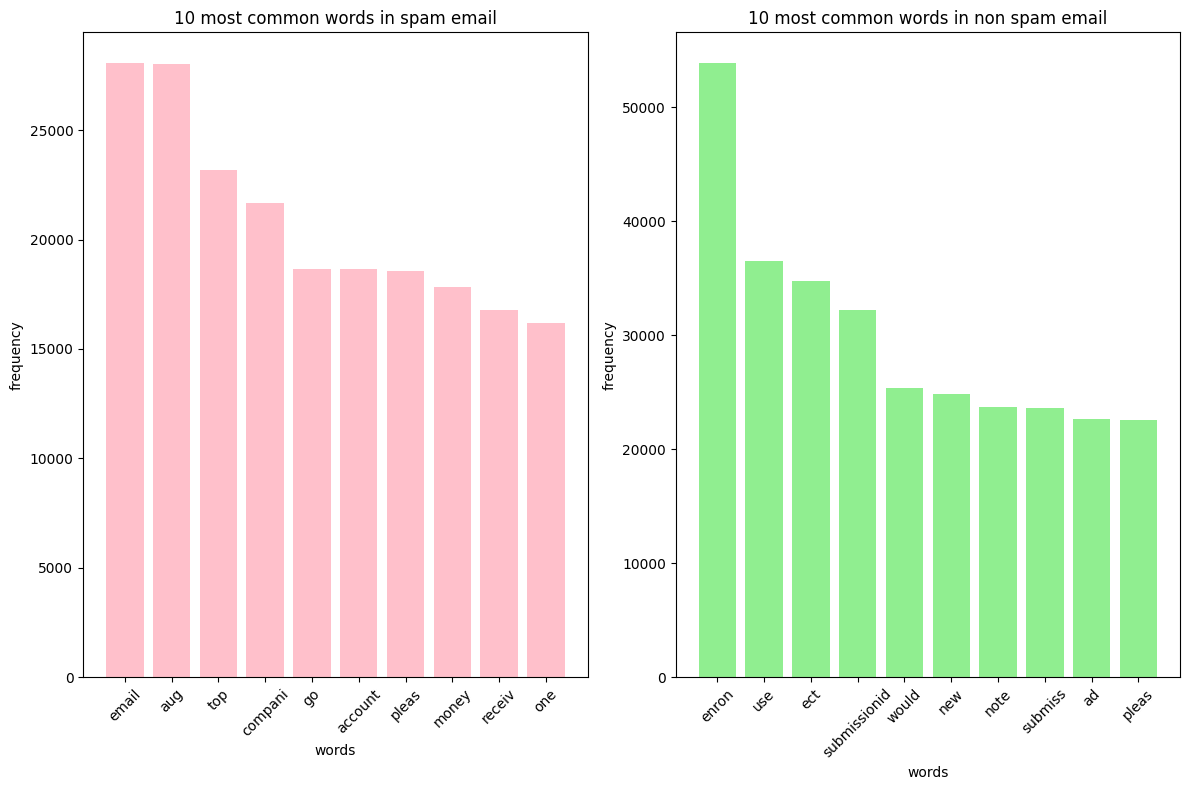

In [24]:
# מיילים מסווגים כספאם
spam_text_combined = " ".join(lower_letters[lower_letters['label'] == 1]["cleaned_text"].tolist())
spam_words = nltk.word_tokenize(spam_text_combined)
spam_word_freq_counter = Counter(spam_words)
all_spam_word_freq = sorted(spam_word_freq_counter.items(), key=lambda x: x[1], reverse=True)
# בחירת 10 המילים הנפוצות ביותר
spam_word_freq = all_spam_word_freq[:10]

# מיילים מסווגים כלא ספאם
non_spam_text_combined = " ".join(lower_letters[lower_letters['label'] == 0]["cleaned_text"].tolist())
non_spam_words = nltk.word_tokenize(non_spam_text_combined)
non_spam_word_freq_counter = Counter(non_spam_words)
all_non_spam_word_freq = sorted(non_spam_word_freq_counter.items(), key=lambda x: x[1], reverse=True)
non_spam_word_freq = all_non_spam_word_freq[:10]


# יצירת גרף השוואה
plt.figure(figsize=(12, 8))

# גרף למיילים ספאם
plt.subplot(1, 2, 1)
plt.bar([word for word, freq in spam_word_freq], [freq for word, freq in spam_word_freq], color='pink')
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("10 most common words in spam email")
plt.xticks(rotation=45)

# גרף למיילים לא ספאם
plt.subplot(1, 2, 2)
plt.bar([word for word, freq in non_spam_word_freq], [freq for word, freq in non_spam_word_freq], color='lightgreen')
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("10 most common words in non spam email")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [25]:
sorted_all_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
total_count = sum(freq for word, freq in sorted_all_words)

def idx_of_percentage(sorted_data, percentage):
    cumulative_count = 0
    total_count = sum(freq for word, freq in sorted_data)
    idx = 0
    while idx < len(sorted_data):
        word, freq = sorted_data[idx]
        cumulative_count += freq
        if cumulative_count / total_count >= percentage:
            break
        idx += 1
    return idx 

# מציאת אינדקס של 80%
idx_80 = idx_of_percentage(sorted_all_words, 0.8)

print("There are", idx_80, "words that make up 80 percent of all words")
print("There are", total_count, "words in total")

# כמות המילים הייחודיות בדאטה
unique_words_count = len(sorted_all_words)
print("In total there are:", unique_words_count, "unique words")



There are 3144 words that make up 80 percent of all words
There are 6976398 words in total
In total there are: 215655 unique words


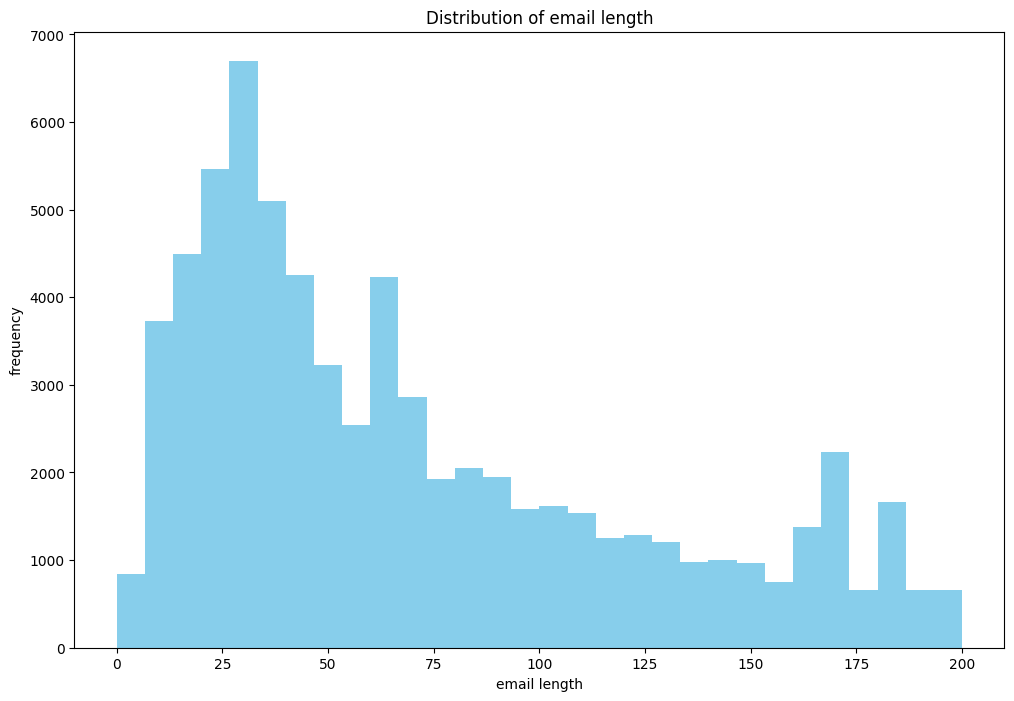

In [26]:
# חישוב אורך כל מייל
email_lengths = lower_letters["cleaned_text"].apply(lambda x: len(x.split()))

# סינון מיילים שאורכם עד 200 מילים
email_lengths = email_lengths[email_lengths <= 200]

# יצירת היסטוגרמה של אורכי המיילים עד 1000 מילים
plt.figure(figsize=(12, 8))
plt.hist(email_lengths, bins=30, color='skyblue')
plt.xlabel("email length")
plt.ylabel("frequency")
plt.title("Distribution of email length")
plt.show()


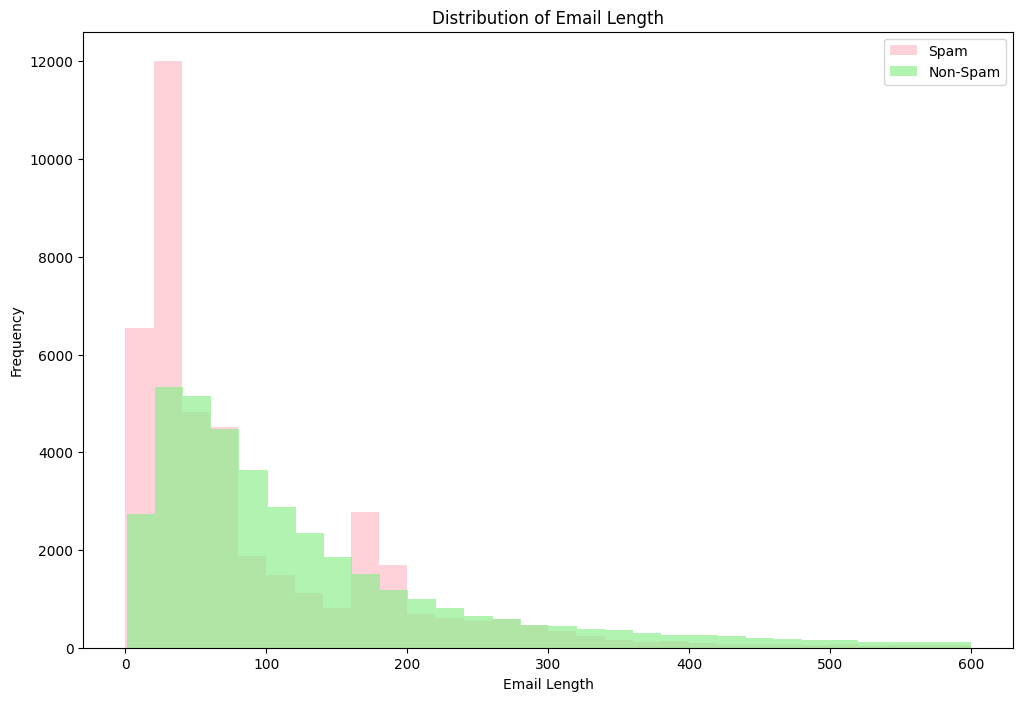

In [27]:
# חישוב אורך כל מייל עבור מיילים המסווגים כספאם
spam_email_lengths = lower_letters[lower_letters['label'] == 1]["cleaned_text"].apply(lambda x: len(x.split()))

# חישוב אורך כל מייל עבור מיילים המסווגים כלא ספאם
non_spam_email_lengths = lower_letters[lower_letters['label'] == 0]["cleaned_text"].apply(lambda x: len(x.split()))

# סינון מיילים שאורכם עד 200 מילים
spam_email_lengths = spam_email_lengths[spam_email_lengths <= 600]
non_spam_email_lengths = non_spam_email_lengths[non_spam_email_lengths <= 600]

# יצירת היסטוגרמה של אורכי המיילים
plt.figure(figsize=(12, 8))

plt.hist(spam_email_lengths, bins=30, color='pink', alpha=0.7, label='Spam')
plt.hist(non_spam_email_lengths, bins=30, color='lightgreen', alpha=0.7, label='Non-Spam')

plt.xlabel("Email Length")
plt.ylabel("Frequency")
plt.title("Distribution of Email Length")

plt.legend()
plt.show()


### Domain Exploration 

In [28]:
# Dictionary to store DataFrames with names
dataframes = {
    'df_SpamAssasin': df_SpamAssasin,
    'df_Nigerian_Fraud': df_Nigerian_Fraud,
    'df_phishing_email': df_phishing_email,
    'df_CEAS_08': df_CEAS_08,
    'df_Enron': df_Enron,
    'df_Ling': df_Ling,
    'df_Nazario': df_Nazario
}

# Iterate over each DataFrame in the dictionary
for df_name, df in dataframes.items():
    # Check if 'sender' column exists in the DataFrame
    if 'receiver' in df.columns:
        df['email'] = df['receiver'].str.extract(r'<(.+?)>', expand=False)
        # Extract domains from the email addresses
        df['receiver_domain'] = df['email'].str.extract(r'@([^.@]+)\.', expand=False)
    else:
        pass

# Iterate over each DataFrame in the dictionary
for df_name, df in dataframes.items():
    # Check if 'sender' column exists in the DataFrame
    if 'sender' in df.columns:
        df['email'] = df['sender'].str.extract(r'<(.+?)>', expand=False)
        # Extract domains from the email addresses
        df['sender_domain'] = df['email'].str.extract(r'@([^.@]+)\.', expand=False)
    else:
        pass



Plotting top 10 label proportions for df_SpamAssasin...


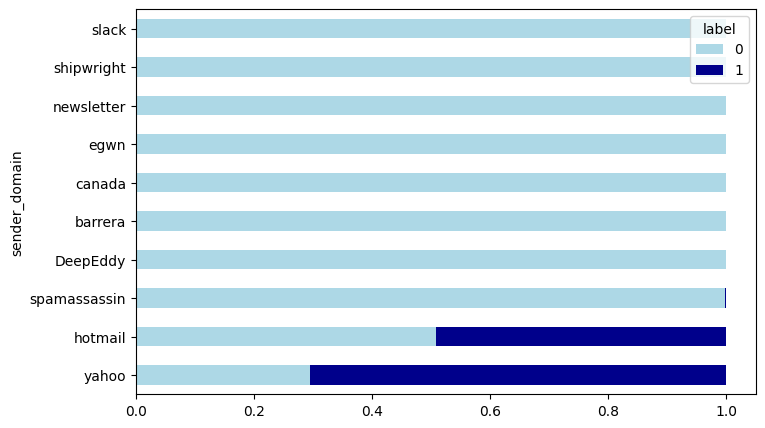

Plotting top 10 label proportions for df_Nigerian_Fraud...


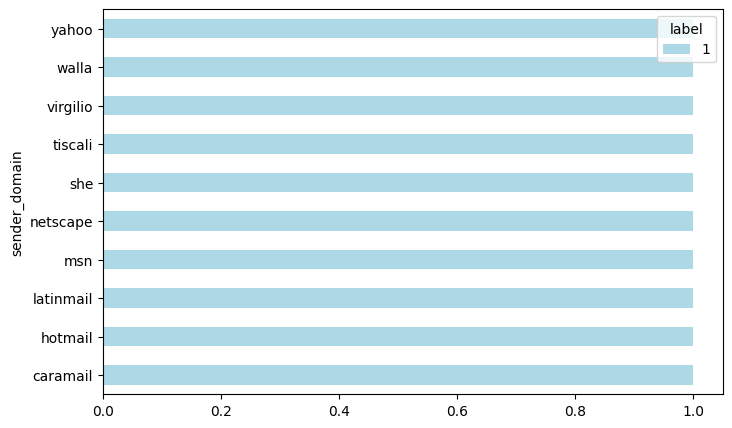

Plotting top 10 label proportions for df_phishing_email...
Plotting top 10 label proportions for df_CEAS_08...


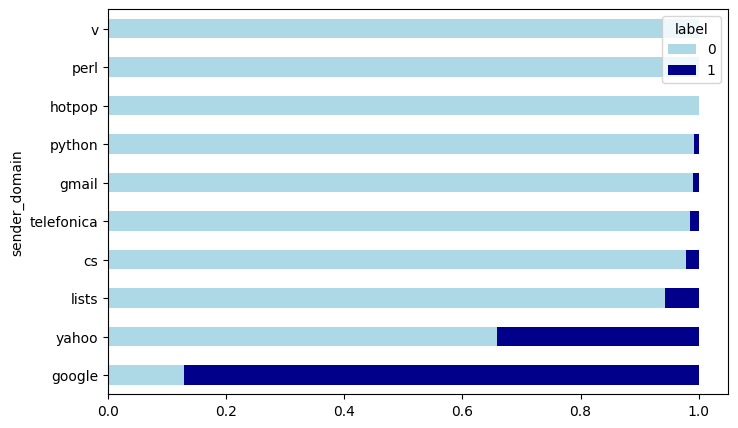

Plotting top 10 label proportions for df_Enron...
Plotting top 10 label proportions for df_Ling...
Plotting top 10 label proportions for df_Nazario...


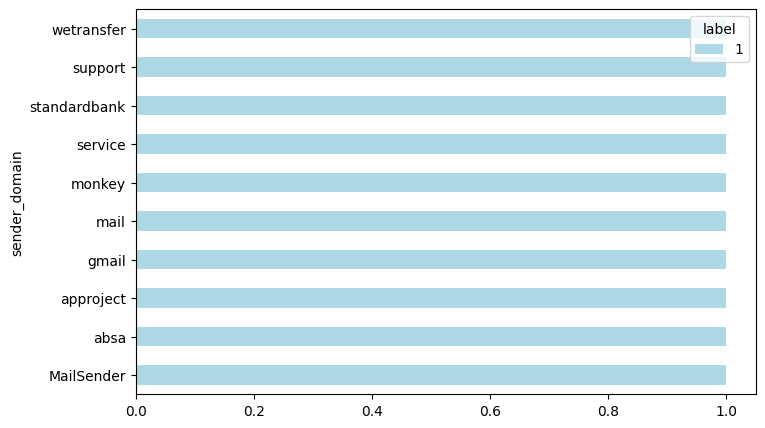

In [30]:
def plot_label_proportion(df, df_name):
    if 'sender_domain' in df.columns:
        # Create a new DataFrame with sender_domain and label
        df_subset = df[['sender_domain', 'label']].copy()
        sorted_values = df_subset['sender_domain'].value_counts().sort_values(ascending=False)
        # Step 2: Extract the top 10 values (index values) from sorted_values
        top_10_values = sorted_values.head(10).index.tolist()
        # Step 3: Filter the DataFrame to include only rows where the column value is in top 10 values
        filtered_df = df[df['sender_domain'].isin(top_10_values)]
        df = pd.crosstab(filtered_df['sender_domain'], filtered_df['label'])
        prop = df.div(df.sum(1).astype(float), axis=0)
        prop = prop.sort_values(by=prop.columns.tolist(), ascending=True)  
        a = prop.plot(kind='barh', stacked=True, figsize=(8, 5), color=['lightblue', 'darkblue'])
        
        plt.show()
        
for name, df in dataframes.items():
    print(f"Plotting top 10 label proportions for {name}...")
    plot_label_proportion(df, name)


Plotting top 5 email domains for df_SpamAssasin...


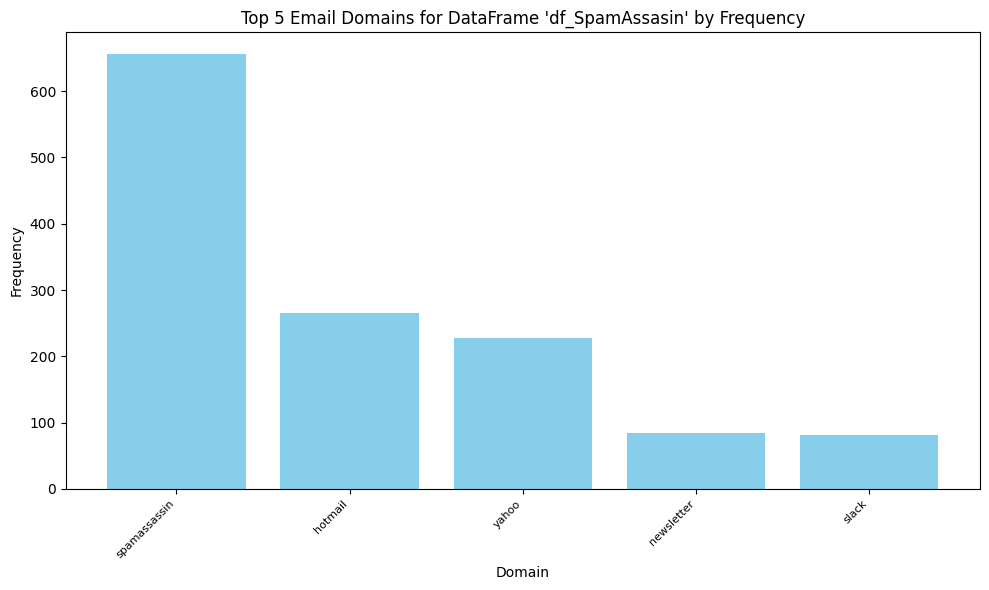

Plotting top 5 email domains for df_Nigerian_Fraud...


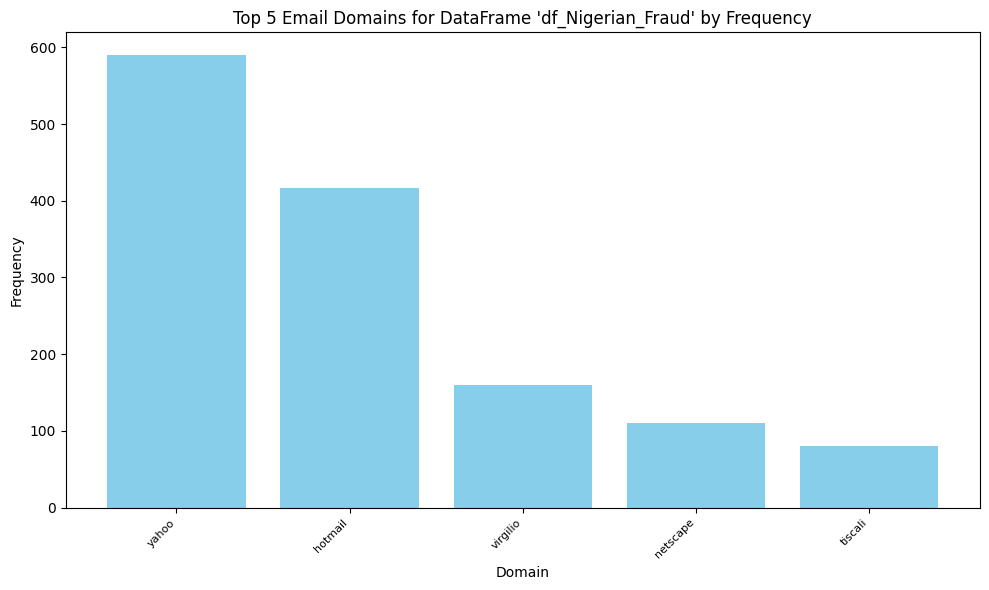

Plotting top 5 email domains for df_phishing_email...
Column 'sender' not found in DataFrame 'df_phishing_email'.
Plotting top 5 email domains for df_CEAS_08...


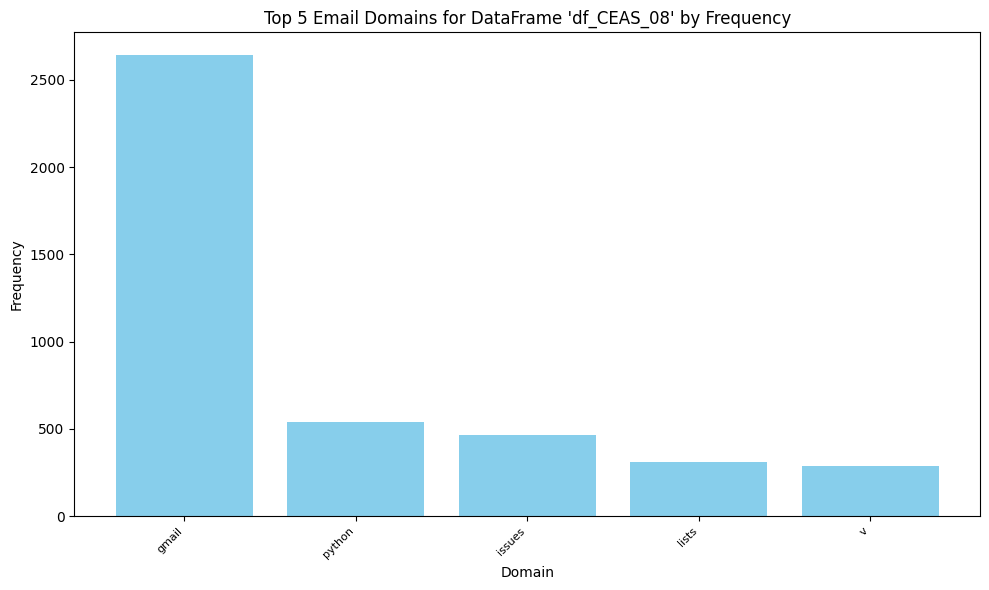

Plotting top 5 email domains for df_Enron...
Column 'sender' not found in DataFrame 'df_Enron'.
Plotting top 5 email domains for df_Ling...
Column 'sender' not found in DataFrame 'df_Ling'.
Plotting top 5 email domains for df_Nazario...


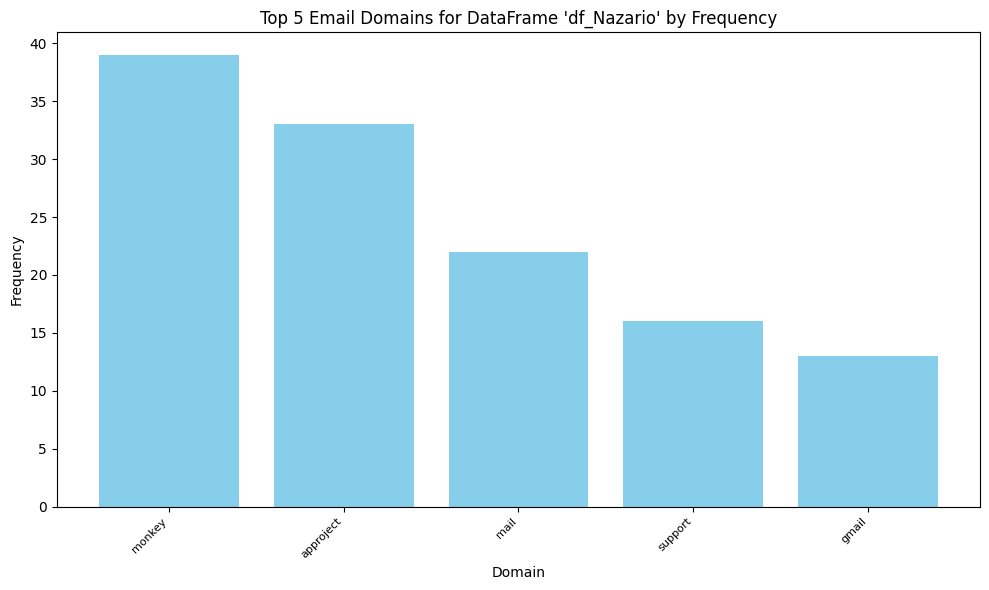

In [31]:
def extract_domain(email):
    # Function to extract domain from email address
    if pd.isna(email):
        return None
    elif '@' in email:
        return email.split('@')[-1].split('.')[0]
    else:
        return None

def plot_sender_domains(df_name, df):
    if 'sender' in df.columns:
        # Extract domains from sender addresses
        sender_domains = df['sender'].apply(extract_domain)

        # Remove None values (for cases where domain extraction failed)
        sender_domains = sender_domains.dropna()

        # Count occurrences of each domain
        domain_counts = Counter(sender_domains)

        # Get top 5 domains by frequency
        top_domains = domain_counts.most_common(5)

        # Extract domain names and frequencies
        domain_names = [domain[0] for domain in top_domains]
        frequencies = [domain[1] for domain in top_domains]

        # Plot bar chart of top domains
        plt.figure(figsize=(10, 6))
        plt.bar(domain_names, frequencies, color='skyblue')
        plt.xlabel('Domain')
        plt.ylabel('Frequency')
        plt.title(f"Top 5 Email Domains for DataFrame '{df_name}' by Frequency")
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column 'sender' not found in DataFrame '{df_name}'.")

# Iterate over each key (DataFrame name) and value (DataFrame) in the dictionary
for df_name, df in dataframes.items():
    print(f"Plotting top 5 email domains for {df_name}...")
    plot_sender_domains(df_name, df)

### Preprocessing

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# יצירת אובייקט TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer_tfidf.fit_transform(filtered_data['cleaned_text'])

# קבלת שמות המילים
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

# חישוב ממוצע ערכי ה-TF-IDF לכל מילה
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
mean_tfidf = tfidf_df.mean(axis=0)

# סינון מילים עם ממוצע TF-IDF נמוך מאוד (לדוגמה, פחות מ-0.01)
threshold = 0.01
important_words = mean_tfidf[mean_tfidf >= threshold].index.tolist()

# יצירת פונקציה לסינון מילים שאינן חשובות
def filter_important_words(text):
    words = text.split()
    filtered_words = [word for word in words if word in important_words]
    return ' '.join(filtered_words)

# סינון המילים בכל שורה בעמודת cleaned_text
filtered_data['filtered_text'] = filtered_data['cleaned_text'].apply(filter_important_words)

# הצגת 5 השורות הראשונות לאחר הסינון
print(filtered_data[['cleaned_text', 'filtered_text']].head())

                                        cleaned_text  \
0      hpl nom may see attach file hplno xl hplno xl   
1  nom actual vol th forward sabra zajac hou ect ...   
2  enron actual march april estim actual march fl...   
3      hpl nom may see attach file hplno xl hplno xl   
4     hpl nom june see attach file hplno xl hplno xl   

                                       filtered_text  
0                                       may see file  
1  ect pm enron com com com enron com enron com e...  
2                                       enron receiv  
3                                       may see file  
4                                           see file  


/var/folders/tp/h1cgd08d0jx2hz44mnbrkh1w0000gn/T/ipykernel_89441/3929455139.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['filtered_text'] = filtered_data['cleaned_text'].apply(filter_important_words)


In [49]:
# Final summary
processed_data = filtered_data[['filtered_text', 'label']]
print(processed_data.info())
print(processed_data.head())

processed_data.to_csv('processed_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 76876 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   filtered_text  76876 non-null  object
 1   label          76876 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB
None
                                       filtered_text  label
0                                       may see file      0
1  ect pm enron com com com enron com enron com e...      0
2                                       enron receiv      0
3                                       may see file      0
4                                           see file      0


In [44]:
# אופציונלי
#Cleaning Text Further

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df_phishing_email['cleaned_text'] = df_phishing_email['text_combined'].apply(clean_text)